In [ ]:
from zipfile import ZipFile
file_name = "XCT-Dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os

set1sample2_dir = os.path.join('/content/XCT-Dataset/Train/set1sample2')
set1sample3_dir = os.path.join('/content/XCT-Dataset/Train/set1sample3')
set1sample4_dir = os.path.join('/content/XCT-Dataset/Train/set1sample4')
set1sample5_dir = os.path.join('/content/XCT-Dataset/Train/set1sample5')
set1sample6_dir = os.path.join('/content/XCT-Dataset/Train/set1sample6')

print('total training set1sample2 images:', len(os.listdir(set1sample2_dir)))
print('total training set1sample3 images:', len(os.listdir(set1sample3_dir)))
print('total training set1sample4 images:', len(os.listdir(set1sample4_dir)))
print('total training set1sample5 images:', len(os.listdir(set1sample5_dir)))
print('total training set1sample6 images:', len(os.listdir(set1sample6_dir)))

set1sample2_files = os.listdir(set1sample2_dir)
print(set1sample2_files[:10])


set1sample3_files = os.listdir(set1sample3_dir)
print(set1sample3_files[:10])


set1sample4_files = os.listdir(set1sample4_dir)
print(set1sample4_files[:10])


set1sample5_files = os.listdir(set1sample5_dir)
print(set1sample5_files[:10])

set1sample6_files = os.listdir(set1sample6_dir)
print(set1sample6_files[:10])

total training set1sample2 images: 112
total training set1sample3 images: 111
total training set1sample4 images: 91
total training set1sample5 images: 111
total training set1sample6 images: 120
['set1sample2raw_0066.png', 'set1sample2raw_0017.png', 'set1sample2raw_0083.png', 'set1sample2raw_0120.png', 'set1sample2raw_0045.png', 'set1sample2raw_0073.png', 'set1sample2raw_0038.png', 'set1sample2raw_0021.png', 'set1sample2raw_0064.png', 'set1sample2raw_0113.png']
['set1sample3raw_0006.png', 'set1sample3raw_0082.png', 'set1sample3raw_0032.png', 'set1sample3raw_0065.png', 'set1sample3raw_0009.png', 'set1sample3raw_0075.png', 'set1sample3raw_0083.png', 'set1sample3raw_0046.png', 'set1sample3raw_0091.png', 'set1sample3raw_0035.png']
['set1sample4raw_0069.png', 'set1sample4raw_0052.png', 'set1sample4raw_0041.png', 'set1sample4raw_0014.png', 'set1sample4raw_0051.png', 'set1sample4raw_0022.png', 'set1sample4raw_0023.png', 'set1sample4raw_0086.png', 'set1sample4raw_0047.png', 'set1sample4raw_0087

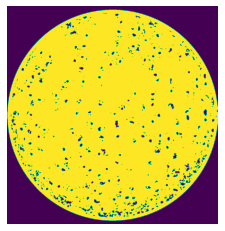

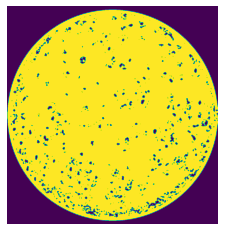

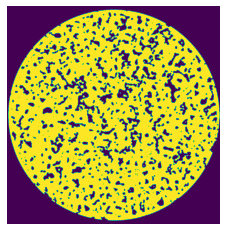

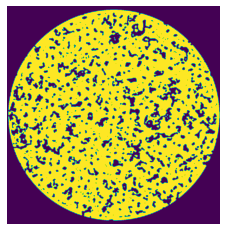

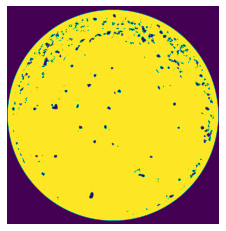

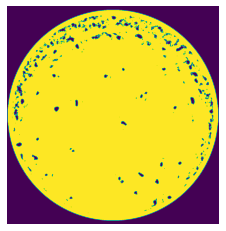

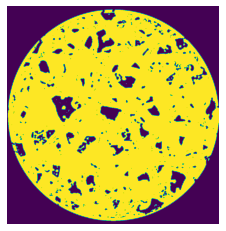

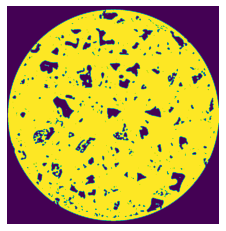

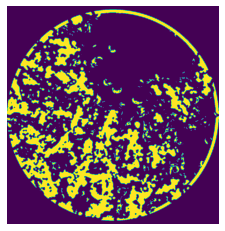

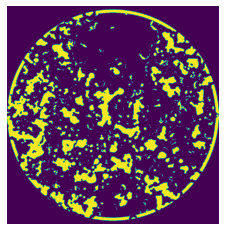

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



pic_index = 2

next_set1sample2 = [os.path.join(set1sample2_dir, fname)
                       for fname in set1sample2_files[pic_index-2:pic_index]]
next_set1sample3 = [os.path.join(set1sample3_dir, fname)
                       for fname in set1sample3_files[pic_index-2:pic_index]]
next_set1sample4 = [os.path.join(set1sample4_dir, fname)
                       for fname in set1sample4_files[pic_index-2:pic_index]]
next_set1sample5 = [os.path.join(set1sample5_dir, fname)
                       for fname in set1sample5_files[pic_index-2:pic_index]]
next_set1sample6 = [os.path.join(set1sample6_dir, fname)
                       for fname in set1sample6_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_set1sample2+next_set1sample3+next_set1sample4+next_set1sample5+next_set1sample6):
  #print (img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  

# model summary
pre_trained_model.summary()


--2020-07-01 17:03:35--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   212MB/s    in 0.4s    

2020-07-01 17:03:36 (212 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999 and logs.get('val_acc')>0.99):
      print("\nReached 99.9% accuracy and 99% validation accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
______________________________________________________________________________________________

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/XCT-Dataset/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/XCT-Dataset/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=1
)



Found 544 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [ ]:
callbacks = myCallback()
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 20,
            epochs = 25,
            validation_steps = 3,
            verbose = 2)

Epoch 1/25
20/20 - 14s - loss: 0.9251 - accuracy: 0.6950 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 2/25
20/20 - 14s - loss: 0.1600 - accuracy: 0.9639 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 3/25
20/20 - 14s - loss: 0.1064 - accuracy: 0.9650 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 4/25
20/20 - 14s - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/25
20/20 - 14s - loss: 0.0440 - accuracy: 0.9900 - val_loss: 9.7281e-04 - val_accuracy: 1.0000
Epoch 6/25
20/20 - 14s - loss: 0.0224 - accuracy: 0.9950 - val_loss: 3.3418e-05 - val_accuracy: 1.0000
Epoch 7/25
20/20 - 14s - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 8/25
20/20 - 13s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.9550e-05 - val_accuracy: 1.0000
Epoch 9/25
20/20 - 14s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.1085 - val_accuracy: 1.0000
Epoch 10/25
20/20 - 14s - loss: 0.0139 - accuracy: 0.9950 - val_loss: 2.0663e-06 - val_accuracy: 

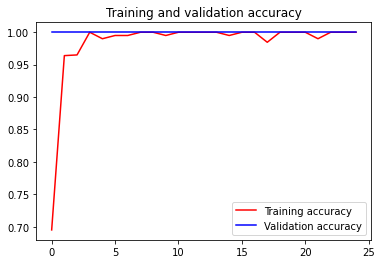

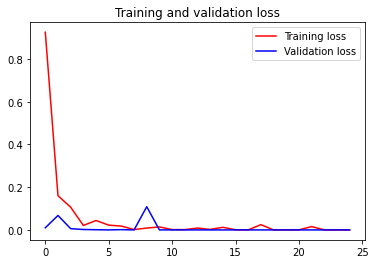

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving set1sample2raw_0121.png to set1sample2raw_0121.png
Saving set1sample2raw_0122.png to set1sample2raw_0122.png
Saving set1sample2raw_0123.png to set1sample2raw_0123.png
Saving set1sample2raw_0124.png to set1sample2raw_0124.png
Saving set1sample2raw_0125.png to set1sample2raw_0125.png
Saving set1sample3raw_0121.png to set1sample3raw_0121.png
Saving set1sample3raw_0122.png to set1sample3raw_0122.png
Saving set1sample3raw_0123.png to set1sample3raw_0123.png
Saving set1sample3raw_0124.png to set1sample3raw_0124.png
Saving set1sample3raw_0125.png to set1sample3raw_0125.png
Saving set1sample4raw_0101.png to set1sample4raw_0101.png
Saving set1sample4raw_0102.png to set1sample4raw_0102.png
Saving set1sample4raw_0103.png to set1sample4raw_0103.png
Saving set1sample4raw_0104.png to set1sample4raw_0104.png
Saving set1sample4raw_0105.png to set1sample4raw_0105.png
Saving set1sample5raw_0121.png to set1sample5raw_0121.png
Saving set1sample5raw_0122.png to set1sample5raw_0122.png
Saving set1sam